In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import plotly.express  as px 

In [2]:
df = pd.read_csv('ccdefault.csv') # read the file
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,F,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,Y
1,2,120000,F,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Y
2,3,90000,F,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,N
3,4,50000,F,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,N
4,5,50000,M,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,M,High School,Married,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,N
29996,29997,150000,M,High School,Single,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,N
29997,29998,30000,M,University,Single,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,Y
29998,29999,80000,M,High School,Married,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,Y


In [3]:
fig1 = px.histogram(df, x = 'LIMIT_BAL', marginal = 'box',
                    title = 'Distribution of balance limit of card', 
                    labels = {'x': 'Dollar($)', 'y': 'Noumber of card'},
                   color_discrete_sequence=px.colors.qualitative.Antique)
fig1.show()

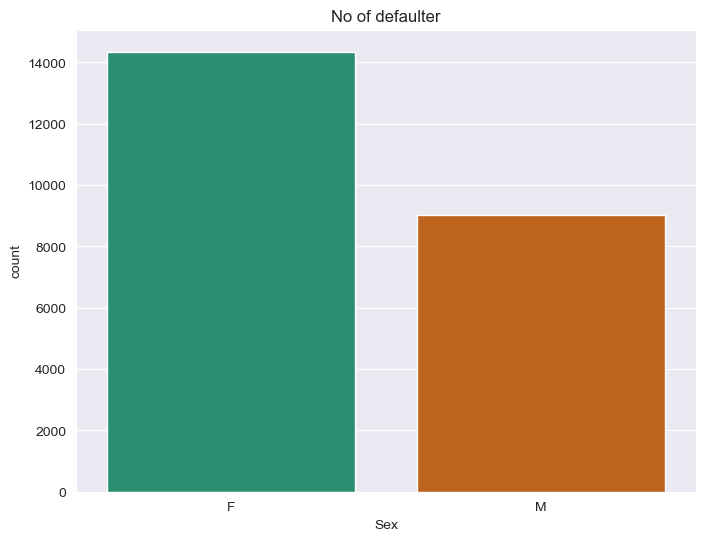

In [4]:
sns.set_style('darkgrid')
plt.figure(figsize = (8,6))
df1 = df[df['default '] == 'N']
sns.countplot(data = df1, x = 'SEX', palette = 'Dark2')
plt.xlabel('Sex')
plt.title('Number of defaulter');

In [5]:
fig2 = px.histogram(df, x = 'AGE', marginal = 'box',
                    title = 'Distribution of Age of card holder', 
                    labels = {'x': 'Dollar($)', 'y': 'Noumber of card'},
                   color_discrete_sequence=px.colors.qualitative.D3,
                   nbins = 75)
fig2.update_traces(marker_line_width=1,marker_line_color="white")

fig2.show()

In [6]:
df.loc[df['EDUCATION'] == 'Others', 'EDUCATION'] = 'Unknown'
df.loc[df['EDUCATION'] == '0', 'EDUCATION'] = 'Unknown'
df2 = df['EDUCATION'].value_counts().reset_index()
df2.columns = ['Education', 'No of people']

fig3 = px.pie(df2, values = 'No of people', names = 'Education',color_discrete_sequence =  px.colors.sequential.Plasma,
             title = 'Education qualification of credit card holder')
fig3.show()

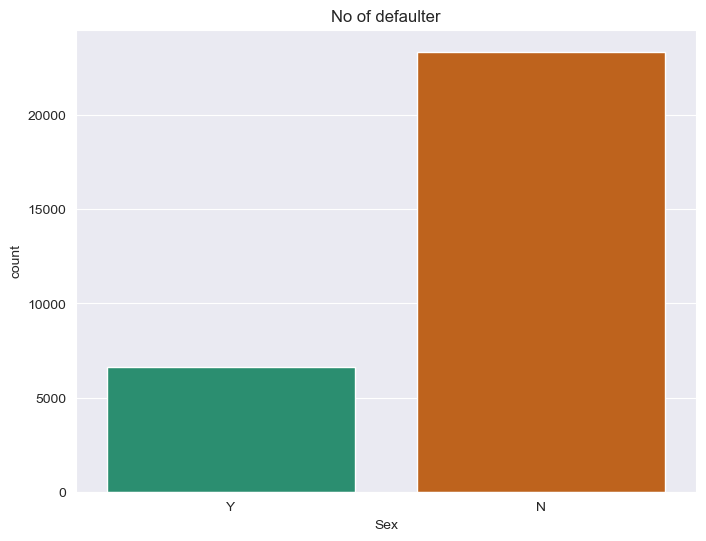

In [7]:
sns.set_style('darkgrid')
plt.figure(figsize = (8,6))
sns.countplot(data = df, x = 'default ', palette = 'Dark2')
plt.xlabel('Sex')
plt.title('Number of defaulter');

In [8]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder         
from sklearn.preprocessing import MinMaxScaler       

In [9]:
cat_col = ['EDUCATION','MARRIAGE', 'SEX' ]

num_col = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
           'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
          'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4','PAY_AMT5', 'PAY_AMT6']


input_col = ['EDUCATION','MARRIAGE', 'SEX','LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
           'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
          'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4','PAY_AMT5', 'PAY_AMT6']

target_col = ['default ']

In [10]:
scaler = MinMaxScaler()
scaler.fit(df[num_col])
df[num_col] = scaler.transform(df[num_col])

In [11]:
cat = df[cat_col]
cat

,EDUCATION,MARRIAGE,SEX
0,University,Married,F
1,University,Single,F
2,University,Single,F
3,University,Married,F
4,University,Married,M
...,...,...,...
29995,High School,Married,M
29996,High School,Single,M
29997,University,Single,M
29998,High School,Married,M


In [12]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(df[cat_col])  # Fit the model on categorical columns

# Get the names of the new features
encoded_cols = list(encoder.get_feature_names_out(cat_col))

# Transform the data and convert it to a dense format
df_encoded = pd.DataFrame(encoder.transform(df[cat_col]).toarray(), columns=encoded_cols)
df = pd.concat([df, df_encoded], axis=1)

# Print the new DataFrame
print(df)

          ID  LIMIT_BAL SEX    EDUCATION MARRIAGE       AGE  PAY_0  PAY_2  \
0          1   0.010101   F   University  Married  0.051724    0.4    0.4   
1          2   0.111111   F   University   Single  0.086207    0.1    0.4   
2          3   0.080808   F   University   Single  0.224138    0.2    0.2   
3          4   0.040404   F   University  Married  0.275862    0.2    0.2   
4          5   0.040404   M   University  Married  0.620690    0.1    0.2   
...      ...        ...  ..          ...      ...       ...    ...    ...   
29995  29996   0.212121   M  High School  Married  0.310345    0.2    0.2   
29996  29997   0.141414   M  High School   Single  0.379310    0.1    0.1   
29997  29998   0.020202   M   University   Single  0.275862    0.6    0.5   
29998  29999   0.070707   M  High School  Married  0.344828    0.3    0.1   
29999  30000   0.040404   M   University  Married  0.431034    0.2    0.2   

       PAY_3  PAY_4  ...  EDUCATION_Graduate school  EDUCATION_High School 

In [13]:
df[encoded_cols]

,EDUCATION_Graduate school,EDUCATION_High School,EDUCATION_University,EDUCATION_Unknown,MARRIAGE_0,MARRIAGE_Married,MARRIAGE_Other,MARRIAGE_Single,SEX_F,SEX_M
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
29995,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
29996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
29997,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
29998,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [14]:
X = df[num_col + encoded_cols]
X.drop('EDUCATION_Unknown', axis = 1)

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT6,EDUCATION_Graduate school,EDUCATION_High School,EDUCATION_University,MARRIAGE_0,MARRIAGE_Married,MARRIAGE_Other,MARRIAGE_Single,SEX_F,SEX_M
0,0.010101,0.051724,0.4,0.4,0.1,0.1,0.0,0.0,0.149982,0.069164,...,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.111111,0.086207,0.1,0.4,0.2,0.2,0.2,0.4,0.148892,0.067858,...,0.003783,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.080808,0.224138,0.2,0.2,0.2,0.2,0.2,0.2,0.172392,0.079532,...,0.009458,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.040404,0.275862,0.2,0.2,0.2,0.2,0.2,0.2,0.188100,0.111995,...,0.001892,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.040404,0.620690,0.1,0.2,0.1,0.2,0.2,0.2,0.154144,0.071601,...,0.001284,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.212121,0.310345,0.2,0.2,0.2,0.2,0.2,0.2,0.313716,0.249208,...,0.001892,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
29996,0.141414,0.379310,0.1,0.1,0.1,0.1,0.2,0.2,0.148008,0.067955,...,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
29997,0.020202,0.275862,0.6,0.5,0.4,0.1,0.2,0.2,0.149674,0.069405,...,0.005864,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
29998,0.070707,0.344828,0.3,0.1,0.2,0.2,0.2,0.1,0.145064,0.140604,...,0.003412,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [15]:
# making the target variable
y = df[target_col]
import warnings 
warnings.filterwarnings(action= 'ignore')
y.loc[y["default "] == "Y", "default "] = 1     #  
y.loc[y["default "] == "N", "default "] = 0

y = y.astype('int')   # as the data type is object we need to convert it into integer

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.2, random_state = 42 ) 

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logistic = LogisticRegression(random_state = 42)
logistic.fit(X_train,y_train)
y_pred1 = logistic.predict(X_val)
acc_1 = accuracy_score(y_val, y_pred1)
score1 = round(acc_1*100,4)
print('The accuracy score of logistic regression is {}%'.format(score1))

The accuracy score of logistic regression is 80.75%


In [18]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Function to clean and prepare the 'EDUCATION' column
def clean_education_column(df):
    df = df.copy()
    df.loc[df['EDUCATION'] == 'Others', 'EDUCATION'] = 'Unknown'
    df.loc[df['EDUCATION'] == '0', 'EDUCATION'] = 'Unknown'
    return df

# Function to apply MinMax scaling to numerical columns
def scale_numerical_columns(df, num_columns):
    scaler = MinMaxScaler()
    df = df.copy()
    df[num_columns] = scaler.fit_transform(df[num_columns])
    return df, scaler

# Function to encode categorical variables
def encode_categorical_columns(df, cat_columns):
    df = df.copy()
    encoder = OneHotEncoder(handle_unknown='ignore')
    encoded_data = encoder.fit_transform(df[cat_columns]).toarray()  # Explicitly converting to dense array
    encoded_cols = encoder.get_feature_names_out(cat_columns)
    df_encoded = pd.DataFrame(encoded_data, columns=encoded_cols, index=df.index)
    df = pd.concat([df, df_encoded], axis=1)
    df.drop(columns=cat_columns, inplace=True)  # Dropping original categorical columns after encoding
    return df, encoder

# Function to split the dataset into train, validation, and test sets
def split_dataset(df, target_column, test_size=0.2, val_size=0.2):
    X = df.drop(columns=target_column)
    y = df[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_size, random_state=42)
    return X_train, X_val, X_test, y_train, y_val, y_test

# Load data and apply functions
df = pd.read_csv('ccdefault.csv')  # Assuming the data is loaded here
df.columns = df.columns.str.strip()
df = clean_education_column(df)
df, scaler = scale_numerical_columns(df, num_columns=['LIMIT_BAL', 'AGE'])
df, encoder = encode_categorical_columns(df, cat_columns=['EDUCATION', 'MARRIAGE', 'SEX'])
X_train, X_val, X_test, y_train, y_val, y_test = split_dataset(df, target_column='default')


In [19]:
# After loading the data
df.columns = df.columns.str.strip()  # Strip whitespace from all column names
print(df['default'].unique())  # Check unique values before conversion

# Convert 'Y'/'N' to 1/0
df['default'] = df['default'].map({'Y': 1, 'N': 0})

# Check for correct conversion
print(df['default'].unique())

['Y' 'N']
[1 0]


In [20]:
# Ensure there are no NaN values
nan_count = df['default'].isna().sum()
print(f"Number of NaN values in target variable after handling: {nan_count}")
assert nan_count == 0, "NaN values are present in the target column."


Number of NaN values in target variable after handling: 0


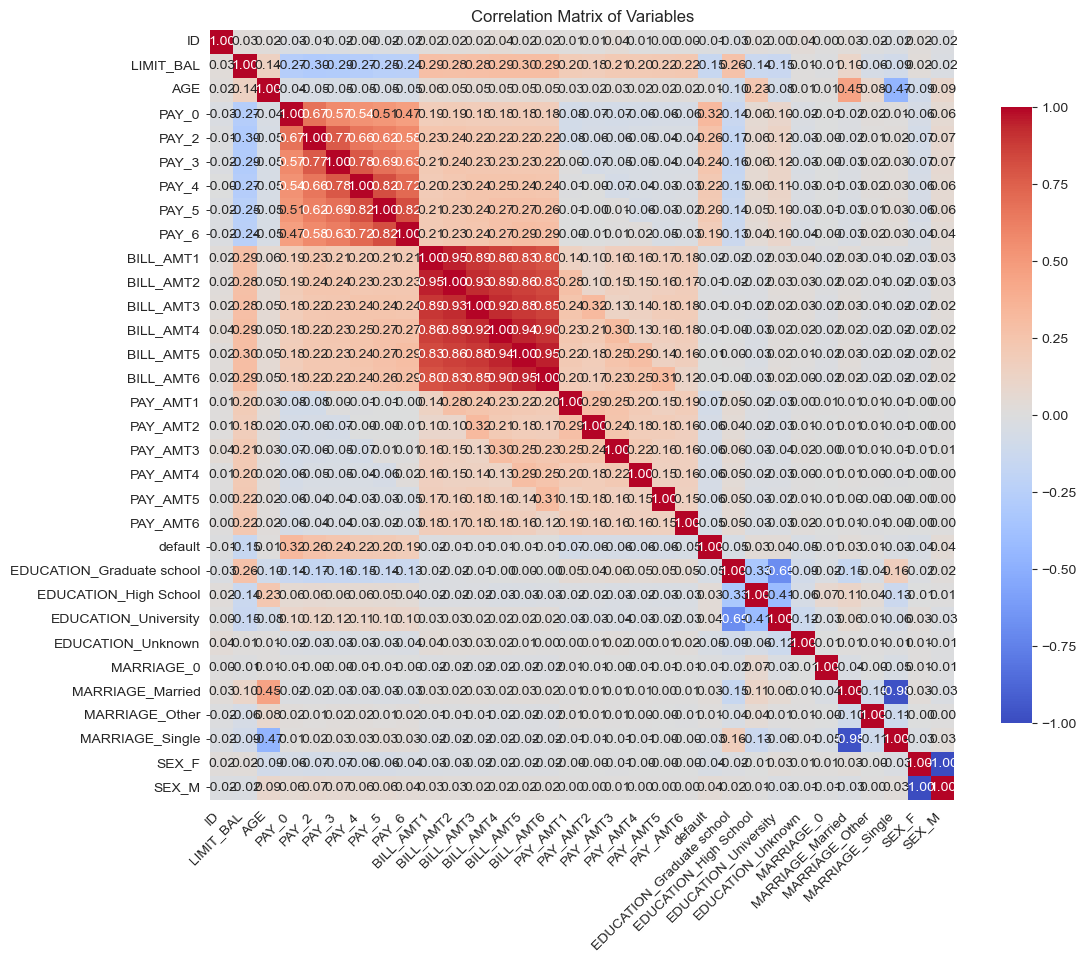

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlations
corr = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={"shrink": .8})

# Adjust the plot to display properly
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Correlation Matrix of Variables')
plt.show()

In [22]:
# Example of selecting features based on correlation threshold
corr_threshold = 0.2  # set a threshold for feature selection
important_features = corr['default'][abs(corr['default']) > corr_threshold].index.tolist()

# Adjust data for model
X_important = df[important_features]
y = df['default']

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      4687
           1       0.69      0.27      0.39      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.62      0.64      6000
weighted avg       0.80      0.81      0.78      6000

ROC AUC score: 0.620509630191983


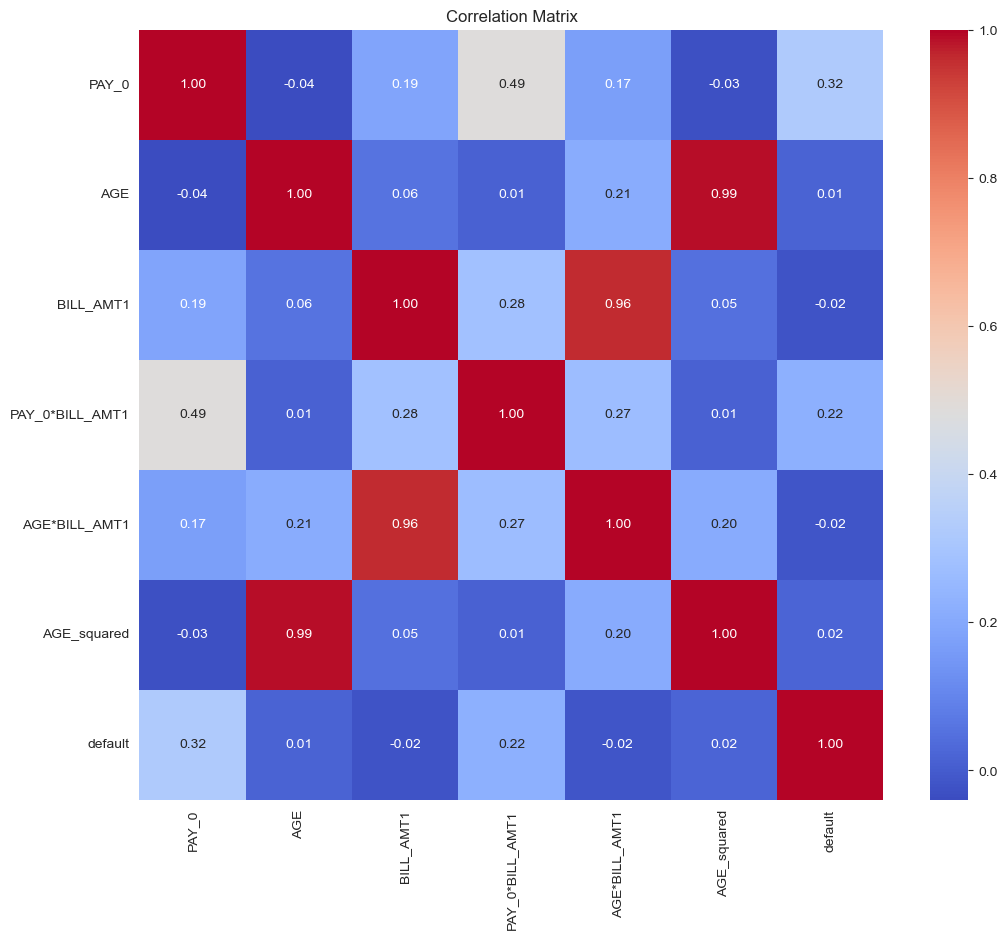

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      4687
           1       0.45      0.54      0.49      1313

    accuracy                           0.76      6000
   macro avg       0.66      0.68      0.67      6000
weighted avg       0.77      0.76      0.76      6000

ROC AUC score with SMOTE: 0.6785085255501638


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE  # Uncomment this if imblearn is installed

# Load the data
df = pd.read_csv('ccdefault.csv')  # Update the path to the location of your CSV file

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Convert 'Y'/'N' in the 'default' column to 1 and 0 respectively
df['default'] = df['default'].map({'Y': 1, 'N': 0})

# Adding interaction features
df['PAY_0*BILL_AMT1'] = df['PAY_0'] * df['BILL_AMT1']
df['AGE*BILL_AMT1'] = df['AGE'] * df['BILL_AMT1']

# Adding polynomial features for 'AGE'
poly = PolynomialFeatures(degree=2, include_bias=False)
age_poly = poly.fit_transform(df[['AGE']])
df['AGE_squared'] = age_poly[:,1]  # Only take the squared term

# Define features and target
features = ['PAY_0', 'AGE', 'BILL_AMT1', 'PAY_0*BILL_AMT1', 'AGE*BILL_AMT1', 'AGE_squared']
X = df[features]
y = df['default']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print("ROC AUC score:", roc_auc_score(y_test, y_pred))

# Correlation Matrix Plot
plt.figure(figsize=(12, 10))
sns.heatmap(df[features + ['default']].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Apply SMOTE to balance the dataset (if imblearn is installed)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)
model.fit(X_train_smote, y_train_smote)
y_pred_smote = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred_smote))
print("ROC AUC score with SMOTE:", roc_auc_score(y_test, y_pred_smote))


In [24]:
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [25]:
# Assuming X_train, X_test, y_train, y_test are already defined
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

In [26]:
params = {
    'max_depth': 6,
    'min_child_weight': 1,
    'eta': 0.3,
    'subsample': 1,
    'colsample_bytree': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
}

In [27]:
num_boost_round = 999
bst = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[0]	Test-auc:0.73007
[1]	Test-auc:0.73539
[2]	Test-auc:0.73478
[3]	Test-auc:0.73380
[4]	Test-auc:0.73461
[5]	Test-auc:0.73569
[6]	Test-auc:0.73668
[7]	Test-auc:0.73668
[8]	Test-auc:0.73700
[9]	Test-auc:0.73699
[10]	Test-auc:0.73663
[11]	Test-auc:0.73680
[12]	Test-auc:0.73599
[13]	Test-auc:0.73590
[14]	Test-auc:0.73511
[15]	Test-auc:0.73462
[16]	Test-auc:0.73441
[17]	Test-auc:0.73493


In [28]:
y_pred = bst.predict(dtest)
y_pred_binary = [1 if y > 0.5 else 0 for y in y_pred]  # Convert probabilities to binary output

print(classification_report(y_test, y_pred_binary))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4687
           1       0.68      0.32      0.44      1313

    accuracy                           0.82      6000
   macro avg       0.76      0.64      0.66      6000
weighted avg       0.80      0.82      0.79      6000

ROC AUC Score: 0.7351555427653842
